In [1]:
# On the top cell run:
from IPython.core.display import display, HTML
from IPython.core.magic import register_cell_magic
@register_cell_magic
def toggle_code(self, cell):
    display(HTML('''
        <script>code_show=true;
        function code_toggle() {
            if (code_show) { $('div.input').hide();}
            else {$('div.input').show();}
            code_show = !code_show
        }
        $(document).ready(code_toggle);
        </script>
        <button onClick="javascript:code_toggle()">Mostrar código</button>'''
    ))
    return display(HTML('<p></p>'))

/tmp/ipykernel_25813/1342761018.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
%%toggle_code
# This comment is necessary for the magic to work

# Lima Buendía

### Sprint1. Exploratorio de datos

 #### Objetivo
 El objetivo del primer sprint es realizar el análisis exploratorio de las fuentes para poder establecer ciertas hipótesis de trabajo. 
 
 Las fuentes de datos a analizar corresponden a los encabezados de las noticias, redes sociales e información pública:
 
+ Meta Cloud: formará el df1
+ Twitter
+ FacebookPages
+ FacebookGroup
+ Monthly state count 
+ INEGI

In [4]:
#Carga de librerías
import boto3
import io
import dotenv
from dotenv import load_dotenv
import os
from dotenv import dotenv_values
import pandas as pd
import re

from io import StringIO
import json
import numpy as np

from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from ipywidgets import widgets
import plotly.figure_factory as ff

[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     eli130888@gmail.co-63df9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# convertimos a minúsculas
def limpiar(texto):
    nuevo_texto = texto.lower()
# Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
# Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto) 
# Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    return(nuevo_texto)

In [6]:
# convertimos a minúsculas
def limpiar_tokenizar(texto):
    nuevo_texto = texto.lower()
# Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
# Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto) 
# Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
# Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')

# Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 2]
    return(nuevo_texto)

In [7]:
stop_words0 = list(stopwords.words('spanish'))

### Lectura de datos

In [8]:
# Obtener el ambiente
load_dotenv()

True

In [9]:
aws_access_key_id = os.getenv("aws_access_key_id")
aws_secret_access_key = os.getenv("aws_secret_access_key")

In [10]:
# Preparacion de conexiones 
client = boto3.client('s3',
    aws_access_key_id = aws_access_key_id,
    aws_secret_access_key = aws_secret_access_key,
    region_name = 'us-east-1'
)
    
# Creating the high level object oriented interface
resource = boto3.resource('s3',
    aws_access_key_id = aws_access_key_id,
    aws_secret_access_key = aws_secret_access_key,
    region_name = 'us-east-1'
)

session = boto3.Session(aws_access_key_id=aws_access_key_id,
                        aws_secret_access_key=aws_secret_access_key
)

In [11]:
# parámetros
s3_res = session.resource('s3')
csv_buffer = StringIO()
bucket_name = 'lima-buendia'

# Llaves
#metacloud = 
m1 = 'processed/cleaned_metacloud.csv'
m2 = 'processed/cleaned_metacloud_oct_nov.csv'
m3 = 'processed/cleaned_twitter.csv'
m4 = 'processed/cleaned_fp.csv'
m5 = 'processed/cleaned_fg.csv'
m6 = 'processed/agregados_nacionales.csv'
m7 = 'processed/defunciones_inegi.csv'
m8 = 'processed/tweets_pos_neg.csv'
m9 = 'processed/femi_virales.csv'
m10 = 'processed/Analisis_palabras_groups.csv'
m11 = 'processed/freq_anual20v1.csv'
m12 = 'processed/graf.csv'
m13 = 'processed/tabla1.csv'
m14 = 'processed/tabla.csv'

In [12]:
# Creacion de objetos
objm1 = client.get_object(Bucket = bucket_name, Key = m1)
objm2 = client.get_object(Bucket = bucket_name, Key = m2)
objm3 = client.get_object(Bucket = bucket_name, Key = m3)
objm4 = client.get_object(Bucket = bucket_name, Key = m4)
objm5 = client.get_object(Bucket = bucket_name, Key = m5)
objm6 = client.get_object(Bucket = bucket_name, Key = m6)
objm7 = client.get_object(Bucket = bucket_name, Key = m7)
objm8 = client.get_object(Bucket = bucket_name, Key = m8)
objm9 = client.get_object(Bucket = bucket_name, Key = m9)
objm10 = client.get_object(Bucket = bucket_name, Key = m10)
objm11 = client.get_object(Bucket = bucket_name, Key = m11)
objm12 = client.get_object(Bucket = bucket_name, Key = m12)
objm13 = client.get_object(Bucket = bucket_name, Key = m13)
objm14 = client.get_object(Bucket = bucket_name, Key = m14)

In [13]:
# metacloud
df=pd.read_csv(objm1['Body'])

df_oct_nov=pd.read_csv(objm2['Body'])

#twitter
df2=pd.read_csv(objm3['Body'])

#facebook pages
fp = pd.read_csv(objm4['Body'])

#Facebook groups
fg=pd.read_csv(objm5['Body'])

#delitos agregados
d_agregados=pd.read_csv(objm6['Body'])

#defunciones INEGI
defunciones_inegi = pd.read_csv(objm7['Body'])

# Tweets positivos y negativos
tw = pd.read_csv(objm8['Body'])

# Feminicidios más virales
fem_virales = pd.read_csv(objm9['Body'])

# Gráfica (Facebook Groups)
graf = pd.read_csv(objm10['Body'])

# Treemap
graf_1 = pd.read_csv(objm11['Body'])

# Gráfica (Facebook Pages)
graf_2 = pd.read_csv(objm12['Body'])

# Tabla 1
tabla1 = pd.read_csv(objm13['Body'])

# Tabla 2
tabla2 = pd.read_csv(objm14['Body'])

/tmp/ipykernel_25813/2590523807.py:2: DtypeWarning: Columns (6,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(objm1['Body'])
/tmp/ipykernel_25813/2590523807.py:10: DtypeWarning: Columns (39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  fp = pd.read_csv(objm4['Body'])


In [14]:
delitos_excluir = ['Rapto', 'Secuestro', 'Corrupción de menores', 'Extorsión', 'Lesiones', 'Otros delitos contra la sociedad', 'Tráfico de menores']
d_agregados=d_agregados[~d_agregados['Tipo de delito'].isin(delitos_excluir)]

In [15]:
print("El dataset de metacloud tiene {} observaciones y {} columnas. \n".format(df.shape[0],df.shape[1]))
print("El dataset de twitter tiene {} observaciones y {} columnas. \n".format(df2.shape[0],df2.shape[1]));
print("El dataset de facebook pages tiene {} observaciones y {} columnas. \n".format(fp.shape[0], fp.shape[1]));
print("El dataset de facebook groups tiene {} observaciones y {} columnas. \n".format(fg.shape[0], fg.shape[1]))
print("El dataset de defunciones del INEGI tiene {} observaciones y {} columnas. \n".format(defunciones_inegi.shape[0], fg.shape[1]))
print("El dataset de tweets positivos y negativos tiene {} observaciones y {} columnas. \n".format(tw.shape[0], fg.shape[1]))

El dataset de metacloud tiene 145174 observaciones y 20 columnas. 

El dataset de twitter tiene 149465 observaciones y 17 columnas. 

El dataset de facebook pages tiene 335653 observaciones y 52 columnas. 

El dataset de facebook groups tiene 56124 observaciones y 12 columnas. 

El dataset de defunciones del INEGI tiene 48 observaciones y 12 columnas. 

El dataset de tweets positivos y negativos tiene 79 observaciones y 12 columnas. 



# Análisis exploratorio de datos

In [16]:
fg.rename(columns={'year':'Year', 'month':'Month', 'clean_message':'Clean_message_FBgroups', 'Total Interactions':'Total_Interactions_FBgroups'}, inplace=True)

In [17]:
fp.rename(columns={'year':'Year', 'month':'Month', 'clean_message':'Clean_message_FBpages', 'Total Interactions':'Total_Interactions_FBpages'}, inplace=True)

In [18]:
d = pd.DataFrame(df.groupby(['YM', 'year','month']).agg({'title':lambda x: x.dropna().size}).rename(columns={'title':'Title_MC'})).reset_index()
d_comp = df_oct_nov.groupby(['YM', 'year','month']).agg({'feminicidio*-count':sum}).rename(columns={'feminicidio*-count':'Title_MC'}).reset_index()
d = pd.concat([d, d_comp])
d = d.groupby(['YM', 'year', 'month']).agg({'Title_MC': lambda x: x.sum()}).reset_index()
d=d.sort_values(by=['year', 'month'])
dfp = pd.DataFrame(fp.groupby(['YM', 'Year','Month']).agg({'Clean_message_FBpages':lambda x: x.dropna().size}).rename(columns={'Clean_message_FBpages':'messages_FBP'})).reset_index()
dfg = pd.DataFrame(fg.groupby(['YM', 'Year','Month']).agg({'Clean_message_FBgroups':lambda x: x.dropna().size}).rename(columns={'Clean_message_FBgroups':'messages_FBG'})).reset_index()
dtw = pd.DataFrame(df2.groupby(['YM', 'year','month']).agg({'text':lambda x: x.dropna().size}).rename(columns={'text':'tweets'})).reset_index()
dfpi = pd.DataFrame(fp.groupby(['YM', 'Year','Month']).agg({'Total_Interactions_FBpages':lambda x: x.sum()}).rename(columns={'Total_Interactions_FBpages':'Facebook Pages'})).reset_index()
dfgi = pd.DataFrame(fg.groupby(['YM', 'Year','Month']).agg({'Total_Interactions_FBgroups':lambda x: x.sum()}).rename(columns={'Total_Interactions_FBgroups':'Facebook Groups'})).reset_index()
d_agregados2 = d_agregados.groupby(['YM']).agg({'delitos':lambda x: x.dropna().sum()}).reset_index()

#### Encabezados de MediaCloud

Al analizar únicamente la información de los enabezados, se observan dos picos: febrero 2020 y marzo 2021. 

Como se observa, 2020 fue un año en donde hubo el mayor volumen de encabezados y en relación a este, 2021 presenta niveles menores, pero crecientes y mucho mayores a la cantidad de encabezados de los años anteriores. Algo curioso es que, en 2020, se observan niveles altos en el último cuatrimestre, mientras que en 2021 esto ocurre en el primer semestre.

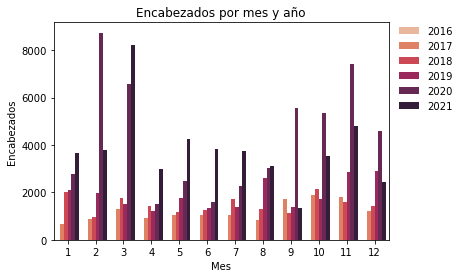

In [19]:
sns.barplot(x = 'month',
            y = 'Title_MC',
            hue = 'year',
            data = d,
            palette = "rocket_r")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)
plt.xlabel('Mes')
plt.ylabel('Encabezados')
plt.title("Encabezados por mes y año") 
plt.show()

Text(0.5, 1.0, 'Encabezados, 2017 a 2022')

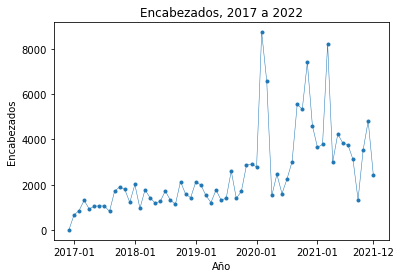

In [20]:
ax= d['Title_MC'].plot(linewidth=0.5, marker='.', linestyle='-');
ax.set_ylabel('Encabezados');
ax.set_xlabel('Año');
ax.set_xticks([1, 13, 25, 37, 49, 60]) 
ax.set_xticklabels(['2017-01', '2018-01', '2019-01', '2020-01', '2021-01', '2021-12']) 

ax.set_title('Encabezados, 2017 a 2022')

Al analizar la serie de tiempo de los encabezados, se observa que van a la alza y a partir de junio 2020 no regresan a los mismos niveles que en 2019. 

#### Analizando los datos de facebook: grupos y páginas

In [21]:
dfbk = pd.merge(dfg, dfp, how='left')
dfbk.rename(columns = {'messages_FBG':'Facebook groups', 'messages_FBP':'Facebook pages'}, inplace = True)
df_melt = pd.melt(dfbk, id_vars=['YM'], value_vars=['Facebook groups', 'Facebook pages'])
df_melt3 = pd.melt(dfbk, id_vars=['Year'], value_vars=['Facebook groups', 'Facebook pages'])

#### Facebook Messages (Groups VS pages) por año

Text(0.5, 1.0, 'Mensajes en facebook (groups VS pages) por año, 2017 a 2022')

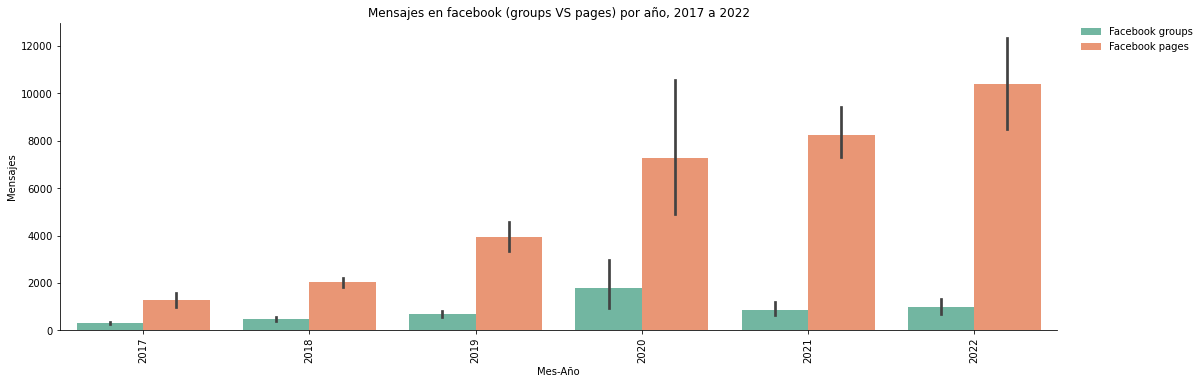

In [22]:
g1=sns.catplot(data=df_melt3, x="Year", y="value", hue="variable", kind="bar", palette="Set2", aspect=3, linewidth = 0.2)
plt.xticks(rotation=90)

g1._legend.remove()
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)
plt.xlabel('Mes-Año')
plt.ylabel('Mensajes')
plt.title("Mensajes en facebook (groups VS pages) por año, 2017 a 2022") 


+ El volumen de mensajes en Facebook Groups presentaba una tenencia positiva hasta 2020; despúes de este año muestra una caída y después vuelve a crecer. Por el contrario, Facebook pages mantiene una una tenedencia positiva para todos los años. Esto es diferente a lo que uno esperaría, pues al ser la misma fuente se habría pensado que tendrían el mismo comportamiento. 

+ La información del año 2022 es parcial dado que la muestra considera la información hasta mayo. No obstante esto, se puede observar que la totalidad de mensajes en Facebook groups en todo el año 2019 es menor a lo que se ha registrado en tan solo 5 meses del 2022.


#### Facebook messages (Groups VS pages) por año y mes

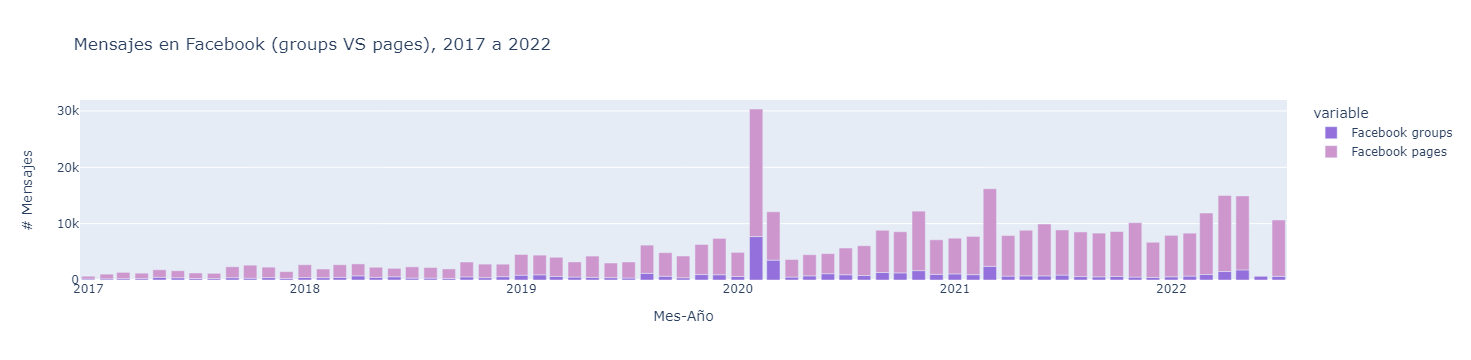

In [23]:
fig = px.bar(df_melt, x='YM', y='value', title='Mensajes en Facebook (groups VS pages), 2017 a 2022', color='variable', 
             color_discrete_sequence=['#9370DB','#CD96CD'], labels={'YM':'Mes-Año', 'value':'# Mensajes'})
fig.show()

+ Al hacer una distinción por año y mes, se podría considerar que, a partir de Febrero 2020 se tiene un antes y después en los mensajes de feminicidios; en el mes de Febrero 2020 se observa un pico en ambas fuentes y ese valor no se ha vuelto a presentar. 

+ Se puede notar un aumento de mensajes apartir de este mes (Febrero 2020) con un nivel promedio que ya no se reduciría a niveles anteriores a Febrero 2020.

+ A partir de Octubre 2020, se puede percibir un nivel contanstante de mensajes girando alrededor de post relacionados. Otro dato a notar también es que los picos más grandes se presentan en los primeros semestres de cada año, considerando los ultimos 3 años: Febrero202, Abril 2021 y Mayo 2022

+ Facebook Groups Y Facebook Pages no son centinelas, esto se vera más claramente con las gráficas anuales de estos mismos datos.

#### Facebook interacciones (Groups VS pages) por año

In [24]:
interacciones = pd.merge(dfgi, dfpi, how='left')
df_melt0 = pd.melt(interacciones, id_vars=['Year'], value_vars=['Facebook Groups', 'Facebook Pages'])
df_melt2 = pd.melt(interacciones, id_vars=['YM'], value_vars=['Facebook Groups', 'Facebook Pages'])

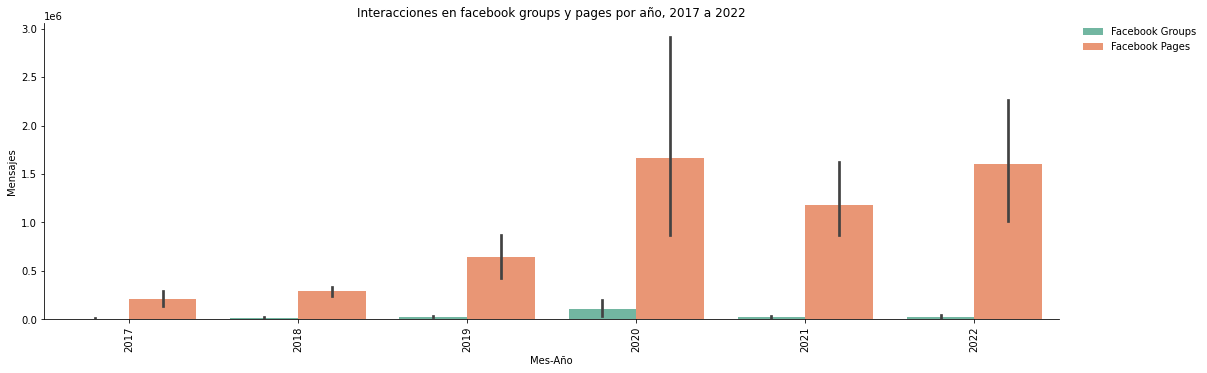

In [25]:
f=sns.catplot(data=df_melt0, x="Year", y="value", hue="variable", kind="bar", palette="Set2", aspect=3, linewidth = 0.2)
plt.xticks(rotation=90)
f._legend.remove()
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)
plt.xlabel('Mes-Año')
plt.ylabel('Mensajes')
_=plt.title("Interacciones en facebook groups y pages por año, 2017 a 2022") 


#### Facebook interacciones (Groups VS pages) por mes y año

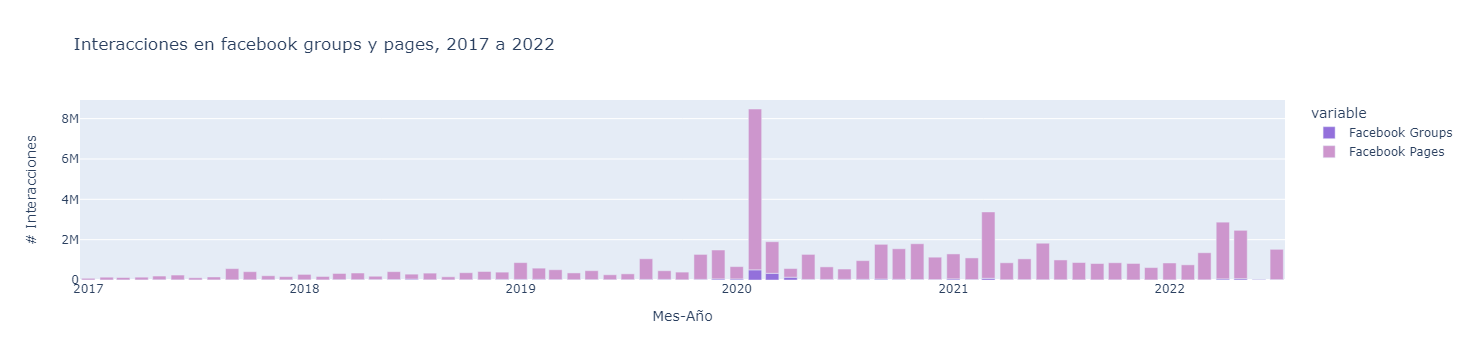

In [26]:
fig = px.bar(df_melt2, x='YM', y='value', title='Interacciones en facebook groups y pages, 2017 a 2022', color='variable', 
             color_discrete_sequence=['#9370DB','#CD96CD'], labels={'YM':'Mes-Año', 'value':'# Interacciones'})
fig.show()

+ Al igual que con los mensajes, hay un antes y un después en cuanto a interacciones de los feminicidios en Facebook Groups y Facebook Pages que ocurre en Febrero 2020.

+ De igual manera que con los mensajes, podemos notar un aumento de interacciones a partir de este mes (Febrero 2020) con un nivel promedio que ya no se reduciría a niveles anteriores a Febrero 2020.

+ A partir de Octubre 2020, se puede percibir, hasta cierto punto, ya que si existen sus picos un nivel contanstante de interacciones girando alrededor de post relacionados. Otro dato a notar tambien es que los picos mas grandes se presentan en los primeros semestres de cada año, al igual que en mensajes, considerando los ultimos 3 años: Febrero 2022, Abril 2021 y Mayo 2022

+ En cuanto a Facebook Groups, podemos notar cómo a partir de Marzo de 2021, hay un declive en interacciones, comportamiento similar en los mensajes. 

A partir de las gráficas anteriors, se puede conlcuir que: 

+ a pesar de que ambas provengan de Facebook, los mensajes en Pages y Groups no tienen el mismo comportamiento. 
+ las interacciones y los mensajes tienen un comportamiento similar sin importar la fuente. 



In [27]:
# Se añade la stoprword: 
stop_words=stop_words0
stop_words0.extend(("feminicidio", "feminista", "mexico","méxico", "tema", "feminicidios", "mujeres", "mujer", "violencia", "feminicida", "co", "si",  "tras", "años","https", "t"))

In [28]:
tw.head()

Unnamed: 0       YM  Total_tweets
0           0  2016-01       4238921
1           1  2016-02       3822036
2           2  2016-03       4404854
3           3  2016-04       4431444
4           4  2016-05       4794590

In [29]:
fem_virales_ag = fem_virales.groupby('YM').agg({'Caso': lambda x: x.tolist()}).reset_index()

In [30]:
fem_virales_ag['# de Casos'] = fem_virales_ag['Caso'].map(len)

In [31]:
fem_virales_ag

YM                                               Caso  # de Casos
0   2017-03                                 [Emma Gabriela M.]           1
1   2017-05                                            [Lesvy]           1
2   2017-06                                          [Valeria]           1
3   2017-08                                       [Jessica S.]           1
4   2017-09             [Mara Fernanda, Mariana F., Pamela S.]           3
5   2017-10                                        [Anayetzin]           1
6   2017-12                                        [Rosalinda]           1
7   2018-01                                            [Emeli]           1
8   2018-03                   [Evelyn, Yessica Celene, Fátima]           3
9   2018-04                                   [Arlet Samantha]           1
10  2018-05                                     [Jimena Paola]           1
11  2018-08                                          [Miranda]           1
12  2018-10                      [Camila C., Ivanna M., Nancy]           3
13  2018-11                                        [Ingrid A.]           1
14  2019-01                                            [Paola]           1
15  2019-02                        [Vianca, Ingrid E., Fátima]           3
16  2019-05                                             [Gaby]           1
17  2019-10                                          [Giselle]           1
18  2019-11                                         [Abril P.]           1
19  2019-12                                       [Nazaret B.]           1
20  2020-08                               [Mariam Reyes/Danna]           1
21  2020-09  [Alondra, Jessica González, Elmy, Carmen, Nohe...           6
22  2020-10                     [Xitlali Elizabeth B., Nayeli]           2
23  2020-11                            [Bianca Alejandrina L.]           1
24  2021-03               [Victoria, Nicole, Ana Lilia, Wendy]           4
25  2021-12                                       [Daniela T.]           1

In [32]:
fem_virales_ag['Caso'] = fem_virales_ag['Caso'].astype('str')

In [33]:
fem_virales_ag['Caso'] = fem_virales_ag['Caso'].str.replace('[', '')
fem_virales_ag['Caso'] = fem_virales_ag['Caso'].str.replace(']', '')
fem_virales_ag['Caso'] = fem_virales_ag['Caso'].str.replace("'", '')

/tmp/ipykernel_25813/1512335683.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/tmp/ipykernel_25813/1512335683.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [34]:
totales = pd.merge(dfg, dfp[['YM', 'messages_FBP']],on='YM',how='left')
totales = pd.merge(totales, dtw[['YM','tweets']], on='YM', how='left')
totales= pd.merge(totales, d[['YM','Title_MC']], on='YM', how='left')
totales = pd.merge(totales, d_agregados2[['YM', 'delitos']], how='left')
totales = pd.merge(totales, defunciones_inegi, on='YM', how='left')
totales = pd.merge(totales, tw, on='YM', how='left')
#totales = pd.merge(totales, fem_virales_ag, on='YM', how='left')
totales = totales.set_index(['YM', 'Year', 'Month'])

In [35]:
# Obtenemos las deltas
totales1= totales - totales.shift(1)

In [36]:
# Estandarizamos los datos
totales3 = (totales - totales.mean()) / totales.std()

In [37]:
totales = totales.reset_index(level=['Year', 'Month'])
totales1 = totales1.reset_index(level=['Year', 'Month'])
totales3 = totales3.reset_index(level=['Year', 'Month'])

Para la conformación total del dataset, se eliminan los mensajes vacíos de Facebook Pages y Facebook Groups. Se valida que en la columna de encabezados no se tengan vacíos y en twitter también.
En la gráfica anterior, se muestra la comparación temporal de los datos y se observa lo siguiente: 
+ La información de Twitter tiene 1 periodo faltante para Julio 2018 y presenta muchos meses con menos de 100 tweets. Se observan picos en algunos meses de 2018 y 2019. 
+ Tanto la serie de Facebook Groups, Facebook Pages y MediaCloud presentan el pico más alto en Febrero 2020; Twitter para ese mismo periodo, presenta 247 tweets y presenta un pico similar al de las otras tres en diciembre (2 meses antes que el resto). 
    - Feb 2020
     
| Fuente | Palabras |
|--------|----------|
| MediaCloud | Fátima, Ingrid, Ingrid Escamilla| 
| Twitter | País, gobierno, lópez obrador |
     
     - Dic 2019
     
| Fuente | Palabras |
|--------|----------|
| MediaCloud | Asesinada, género, presunta| 
| Twitter | Club América, américa sub, violador |

+ Facebook Groups y Facebook Pages no presentan el mismo comportamiento. Por ejemplo, en marzo 2021 ambos presentan una alza considerabale en relación al mes anterior; en abril disminuyen y para los siguientes meses, la primera -Facebook Groups- presenta un comportamiento casi sin cambios y, Facebook Pages crece por tres meses consecutivos. Adicional a lo anterior, los últimos meses también tienen un comportamiento distinto. Facebook Groups tiene una tendencia a la alza con un crecimiento casi constante, mientras que Facebook Pages crece rápidamente y el último periodo presenta un cambio de pendiente.
+ Febrero, en distintos años, resulta ser un mes de picos:

    - series de Facebook y MediaCloud: en 2020
    - Twitter ocurre en 2018. 
+ Otro punto que resulta de interés es la tendencia contraria que se observa entre MediaCloud y las de Facebook para el periodo de mayo 2020. El número de encabezados disminuye mientras que el total de páginas crece y el de grupos se mantiene casi estable. 

En relación a los delitos (fuente: ), se observa el mismo comportamiento entre las series (encabezados, redes sociales y delitos), por ejemplo: en abril 2020, hay una disminución en todos las fuentes; sin embargo, de mayo a julio del mismo año, los delitos fueron en aumento, mientras que los encabezados y facebook pages crecieron y luego decrecieron. 

Al añadir la serie de delitos, hay varios puntos que llaman la atención:

+ La serie de delitos presenta uno de sus picos más altos en Agosto 2018 y ninguna de las series de redes sociales ni encabezados presentan un pico cercano a ese periodo; en efecto, 3 de las 4 series presentan un movimento a la alza ligeramente grande, pero no llegan a ser los picos más grandes. 
+ En el periodo en el que twitter presenta un pico (Diciembre 2019), los delitos presentan una disminución. 
+ Noviembre 2019: facebook y MediaCloud van a la alza mientras que los delitos a la baja. 
+ Febrero 2020: pico en varias series y los delitos en niveles similares a mayo 2019.
+ De junio a octubre de 2021, la serie de facebook group hace una especie de parábola mientras que los delitos suben y bajan. 

+ **Marzo 2021** es uno de los puntos en donde las series, salvo twitter, coinciden.



**NOTA:** Para la construcción de los words clouds, se agregaron las palabras *feminicidio*, *feminicidios*, *mujeres*, *mujer*, *violencia*, *feminicida*, *feminista*, *mexico*, *méxico* *tras*, *años*,*https* a las stopping words. 

#### Consideramos la estandarización de los datos

Al considerar la estandarización de los datos se puede observar que:
+ A finales de 2019 existió un incremento en las defunciones registradas por INEGI, tales defunciones se refieren a homicidios generados a mujeres. Mientras que en febrero de 2020 ocurrió una disminución, esto también sucedió con los datos de los tweets positivos y negativos. 
+ Para los datos de tweets positivos y negativos, existió un crecimiento en marzo de 2020, sin embargo para ese periodo se puede notar que los mensajes de Facebook Pages disminuyeron.

In [38]:
totales3 = totales3.reset_index()

In [39]:
totales_a = totales.reset_index()

In [40]:
totales3.columns

Index(['YM', 'Year', 'Month', 'messages_FBG', 'messages_FBP', 'tweets',
       'Title_MC', 'delitos', 'Unnamed: 0_x', '# de defunciones',
       'Unnamed: 0_y', 'Total_tweets'],
      dtype='object')

In [41]:
totales3.rename(columns = {'messages_FBG':'Mensajes Facebook Groups', 'messages_FBP':'Mensajes Facebook Pages', 
                          'Title_MC': 'Encabezados MediaCloud', '# de defunciones':'Defunciones INEGI', 'delitos': 'Delitos Secretariado', 
                          'Total_tweets': 'Total Tweets'}, inplace = True)

In [42]:
totales3.shape

(67, 12)

In [43]:
totales3.columns

Index(['YM', 'Year', 'Month', 'Mensajes Facebook Groups',
       'Mensajes Facebook Pages', 'tweets', 'Encabezados MediaCloud',
       'Delitos Secretariado', 'Unnamed: 0_x', 'Defunciones INEGI',
       'Unnamed: 0_y', 'Total Tweets'],
      dtype='object')

In [44]:
totales4 = pd.melt(totales3, id_vars =['YM', 'Year'], value_vars =['Mensajes Facebook Groups',
       'Mensajes Facebook Pages', 'tweets', 'Encabezados MediaCloud',
       'Delitos Secretariado', 'Defunciones INEGI', 'Total Tweets'])

In [45]:
totales4.head()

YM  Year                  variable     value
0  2017-01  2017  Mensajes Facebook Groups -0.651686
1  2017-02  2017  Mensajes Facebook Groups -0.630802
2  2017-03  2017  Mensajes Facebook Groups -0.595002
3  2017-04  2017  Mensajes Facebook Groups -0.588040
4  2017-05  2017  Mensajes Facebook Groups -0.353347

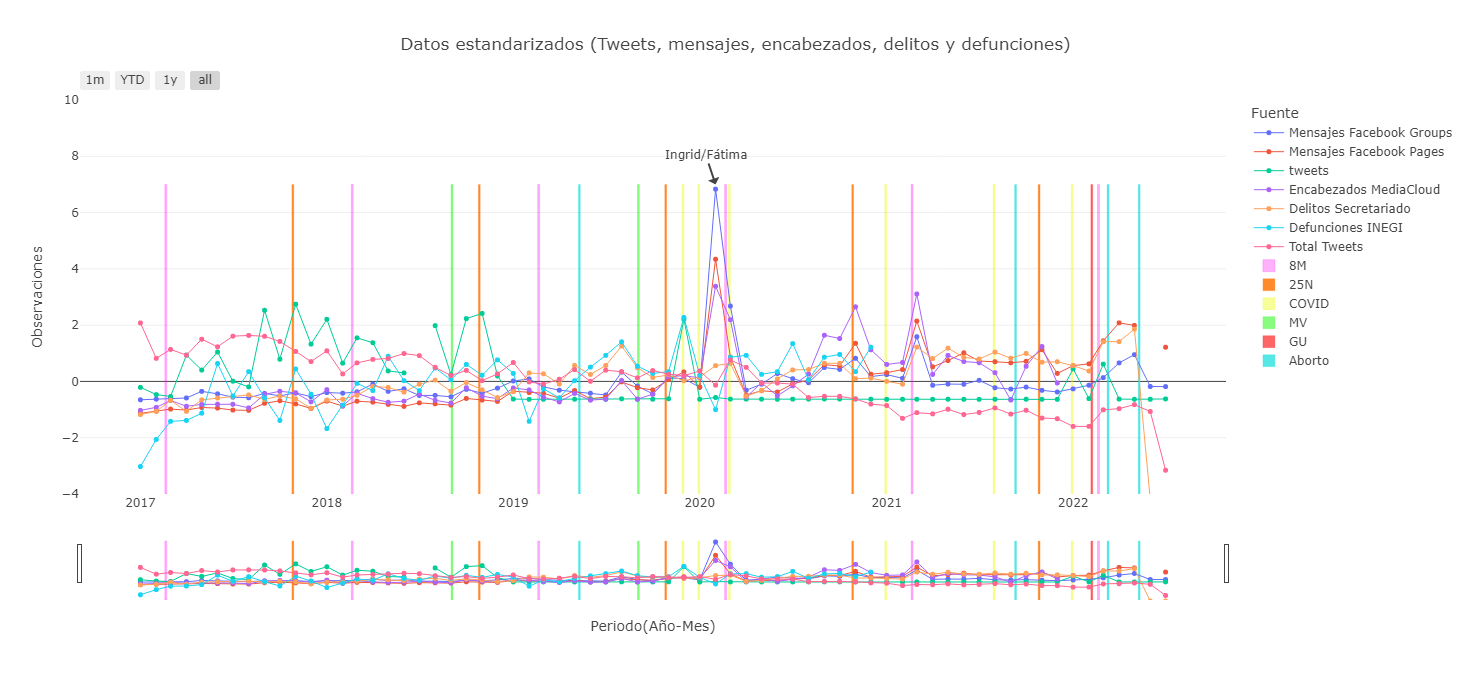

In [46]:
fig = go.Figure()

fig = px.line(totales4, x="YM", y="value", color="variable",
              title='Datos estandarizados (Tweets, mensajes, encabezados, delitos y defunciones)',
             labels={"YM": "Periodo(Año-Mes)", "value": "Observaciones", "variable": "Fuente"})

fig.update_traces(
    line={"width": 1},
    marker={"size": 5},
    mode="lines+markers",
    hovertemplate = '%{x}: %{y:.2f}'
    
)

fig.update_layout(
    #dragmode="zoom",
    hovermode=None,
    yaxis_range=[-4, 10], 
    #legend=dict(traceorder="reversed"),
    height=700,
    width= 1000,
    template="none",
    margin=dict(
        t=100,
        b=100
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Rockwell"
    )
)


fig.update_layout(
    xaxis=dict(
        autorange=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.add_bar(x=["2017-03", "2018-03", "2019-03", "2020-03", "2021-03", "2022-03"], y=[11, 11, 11, 11, 11, 11],
                base=[-4, -4, -4, -4, -4, -4],
                marker_color='rgba(250, 0, 242, 0.3)',
                name='8M',
                hovertemplate="%{x}",
                marker_line_width=0.2,
                marker_line_color='rgb(250, 0, 242)'
                )


fig.add_bar(x=["2017-11", "2018-11", "2019-11", "2020-11", "2021-11"], y=[11, 11, 11, 11, 11],
                base=[-4, -4, -4, -4, -4],
                marker_color='rgba(255, 115, 1, 0.83)',
                name='25N',
                hovertemplate="%{x}",
                marker_line_width=0.2,
                marker_line_color='rgb(255, 115, 1)'
                )

fig.add_bar(x=["2019-12", "2020-01", "2020-03", "2021-01", "2021-08", "2022-01"], y=[11, 11, 11, 11, 11, 11],
                base=[-4, -4, -4, -4, -4, -4],
                marker_color='rgba(232, 250, 0, 0.4)',
                name='COVID',
                hovertemplate="%{x}",
                marker_line_width=0.2,
                marker_line_color='rgb(232, 250, 0)'
                )

fig.add_bar(x=["2019-09", "2018-09"], y=[11, 11],
                base=[-4, -4],
                marker_color='rgba(18, 250, 0, 0.5)',
                name='MV',
                hovertemplate="%{x}",
                marker_line_width=0.2,
                marker_line_color='rgb(18, 250, 0)'
                )

fig.add_bar(x=["2022-02"], y=[11],
                base=[-4],
                marker_color='rgba(250, 0, 0, 0.6)',
                name='GU',
                hovertemplate="%{x}",
                marker_line_width=0.2,
                marker_line_color='rgb(250, 0, 0)'
                )

fig.add_bar(x=["2022-03", "2019-05", "2021-09", "2022-05"], y=[11, 11, 11, 11],
                base=[-4, -4, -4, -4],
                marker_color='rgba(13, 221, 218, 0.7)',
                name='Aborto',
                hovertemplate="%{x}",
                marker_line_width=0.2,
                marker_line_color='rgb(13, 221, 218)'            
                )


fig.add_annotation( # add a text callout with arrow
    text="Ingrid/Fátima", x="2020-02", y=7, arrowhead=1, showarrow=True
)




In [47]:
# Filtrando la información para dic 19 y feb 20
df2019 = df[(df.YM=='2019-12')]
tw2019 = df2[(df2.YM=='2019-12')]

df2020 = df[(df.YM=='2020-02')]
fp2020 = fp[(fp.YM=='2020-02')]
fg2020 = fg[(fg.YM=='2020-02')]
tw2020 = df2[(df2.YM=='2020-02')]


df2019['title_limpio'] = df2019['title'].apply(lambda x: limpiar(x))
tw2019['title_limpio'] = tw2019['text'].apply(lambda x: limpiar(x))

df2020['title_limpio'] = df2020['title'].apply(lambda x: limpiar(x))
tw2020['title_limpio'] = tw2020['text'].apply(lambda x: limpiar(x))


text = df2020.title_limpio
text = ' '.join(text).lower()

texttw = tw2020.title_limpio
texttw = ' '.join(texttw).lower()

text19 = df2019.title_limpio
text19 = ' '.join(text19).lower()

texttw19 = tw2019.title_limpio
texttw19 = ' '.join(texttw19).lower()



In [48]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words0,
                colormap = 'tab10',
                collocations = True,
                min_font_size = 8).generate(text)

In [49]:
wordcloud_1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words0,
                colormap = 'tab10',
                collocations = True,
                min_font_size = 8).generate(texttw)

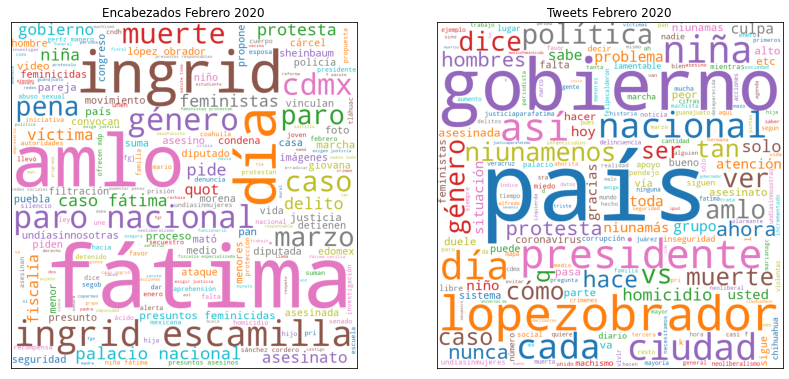

In [50]:
plt.figure(figsize = (14, 14), facecolor = None)
plt.subplot(2, 2, 1)
plt.imshow(wordcloud)
plt.xticks([])
plt.yticks([])
_=plt.title('Encabezados Febrero 2020')
#axarr[1].imshow(wordcloud_1)

plt.subplot(2, 2, 2)
plt.imshow(wordcloud_1)
plt.xticks([])
plt.yticks([])
_=plt.title('Tweets Febrero 2020')



In [51]:
wordcloud19 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words0,
                colormap = 'tab10',
                collocations = True,
                min_font_size = 8).generate(text19)

In [52]:
wordcloudtw19 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words0,
                colormap = 'tab10',
                collocations = True,
                min_font_size = 8).generate(texttw19)

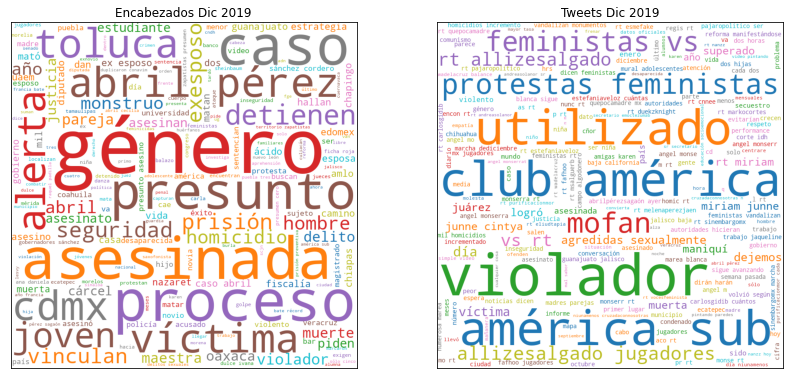

In [53]:
plt.figure(figsize = (14, 14), facecolor = None)
plt.subplot(2, 2, 1)
plt.imshow(wordcloud19)
plt.xticks([])
plt.yticks([])
_=plt.title('Encabezados Dic 2019')
#axarr[1].imshow(wordcloud_1)

plt.subplot(2, 2, 2)
plt.imshow(wordcloudtw19)
plt.xticks([])
plt.yticks([])
_=plt.title('Tweets Dic 2019')


- Previo a la definición de viralidad se analizan las palabras frecuentes en cada fuente con el objetivo de identificar si existen algunas comunes entre ellas. 

In [54]:
df_fuente = (
    graf_1.groupby(["fuente", "year"], as_index=False)
    .sum())

df_fuente["token"] = df_fuente["fuente"]
df_fuente["fuente"] = "año"


df_year = (
    graf_1.groupby(["year"], as_index=False).sum())
df_year['token']='año'
df_year['fuente']=''

df_total = df_fuente.append(
    graf_1[
        [
            "fuente",
            "year",
            "freq",
            "token"
            
        ]
    ]
)
df_total = df_total.append(
    df_year[
        [
            "fuente",
            "year",
            "freq",
            "token"
            
        ]
    ]
)

/tmp/ipykernel_25813/1421027606.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_25813/1421027606.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



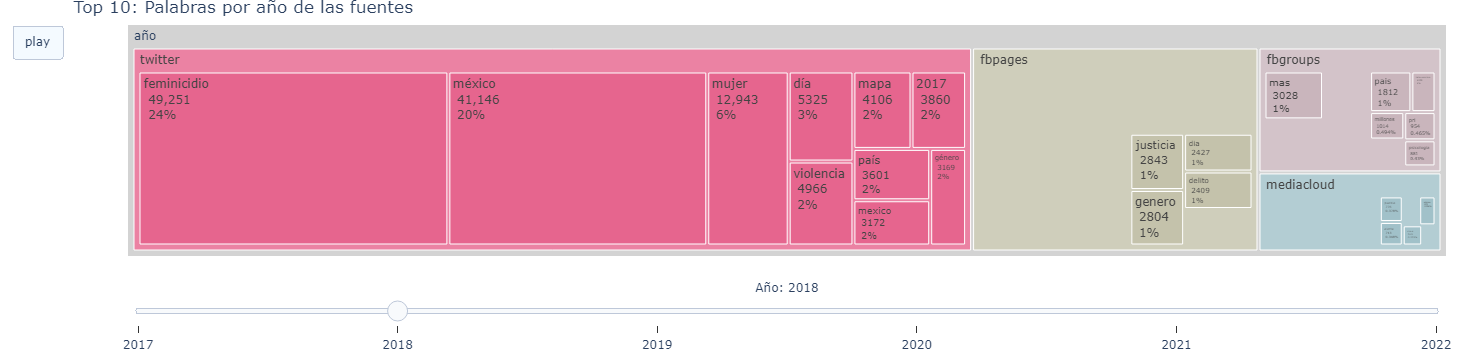

In [55]:
frame0 = None
frames = []
years= df_total['year'].unique()
for year in years:
    mask = df_total.year == year
    df_tmp = (df_total[mask])   
    treemap = go.Treemap(
        labels=df_tmp["token"], 
        values=df_tmp["freq"],
        parents=df_tmp["fuente"],
        branchvalues="total",
        pathbar_textfont_size=15,
        root_color="lightgrey",
        texttemplate='%{label} <br> %{value} <br> %{percentRoot}'
    )
    if frame0 is None:
        frame0 = treemap
    frames.append(go.Frame(name=f"frame-{year}", data=treemap
    ))
    
#Make sliders
sliders = [
    dict(
        steps=[
            dict(
                method="animate",
                args=[
                    [f"frame-{year}"],
                    dict(mode="e", frame=dict(redraw=True), transition=dict(duration=100))],
                label=f"{year}")
            for year in years
        ],
        transition=dict(duration=0),
        x=0,
        y=0,
        currentvalue=dict(
            font=dict(size=12), prefix="Año: ", visible=True, xanchor="center"
        ),
        len=1.0,
        active=1,
    )  
]

#create the layout object with slider parameters
layout = {
    "title": f"Top 10: Palabras por año de las fuentes",
    "updatemenus": [
        { "type": "buttons",
            "buttons": [
                { "method": "animate",
                    "label": "play",
                    "args": [
                        None,
                        dict(
                            frame=dict(duration=700, redraw=True),
                            transition=dict(duration=100),
                            fromcurrent=True,
                            mode="immediate",
                        ),
                    ],
                }
            ],
        }
    ],
    "sliders": sliders,
}

#Create the final figure with layout and frames parameter
figure = go.Figure(
    data=frame0,
    layout=layout,
    frames=frames
)

colors=['#E6658E', '#C4C2AB', '#C9B5BC', '#A1C1C9', '#20667A']
figure.update_layout(margin = dict(t=25, l=25, r=25, b=25), treemapcolorway=colors)

figure.show()

# ¿Cómo definimos viralidad?

Para la definición de viralidad se consideraron 2 feminicidios que forman parte de los hitos compartidos por _SocialTIC_ :
- En el caso de Facebook Groups: **Ingrid Escamilla** y **Debanhi Escobar**.
- En el caso de Facebook Pages: **Ingrid Escamilla**.

#### Facebook Groups

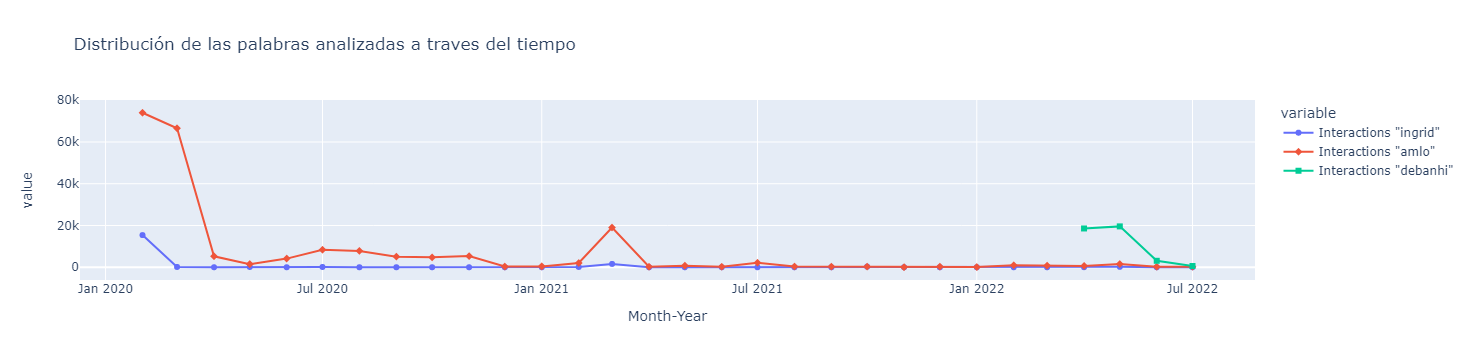

In [56]:
fig7 = px.line(graf, x='Month-Year', y='value',title='Distribución de las palabras analizadas a traves del tiempo', markers=True, color='variable', symbol='variable')
fig7.show()

#### Facebook Pages

Idea: Obtener todas las palabras relacionadas con los casos antes mencionados y analizar en qué medios estaban hablando de ellas, así como saber qué otros temas surgían al mismo tiempo.

In [57]:
tabla1

Unnamed: 0                                 Page Name  \
0            0                      En Un 2x3 Tamaulipas   
1            1                Museo Memoria y Tolerancia   
2            2                                   NotiYuc   
3            3                            Somos el medio   
4            4          Reportes y Accidentes Al Momento   
5            5                                24 Morelos   
6            6                         Magdalena Informa   
7            7                       Noticias Manzanillo   
8            8                         Reportero Nayarit   
9            9  Noticias: Empleos Tizayuca & Alrededores   
10          10                       El Universal Online   
11          11                                      NMás   
12          12                          Venga La Alegría   
13          13                        Aristegui Noticias   
14          14                        Somos los otros NY   
15          15                             Forbes México   
16          16                      El Heraldo de México   
17          17                           Plumas Atómicas   

                                        words  \
0              ['ingrid escamilla', 'ingrid']   
1              ['ingrid escamilla', 'ingrid']   
2                                  ['ingrid']   
3                                  ['ingrid']   
4              ['ingrid escamilla', 'ingrid']   
5              ['ingrid escamilla', 'ingrid']   
6              ['ingrid escamilla', 'ingrid']   
7              ['ingrid escamilla', 'ingrid']   
8              ['ingrid escamilla', 'ingrid']   
9              ['ingrid escamilla', 'ingrid']   
10             ['ingrid escamilla', 'ingrid']   
11             ['ingrid escamilla', 'ingrid']   
12             ['ingrid escamilla', 'ingrid']   
13                                 ['ingrid']   
14  ['#ingridescamilla', '#ingrid', 'ingrid']   
15  ['#ingridescamilla', '#ingrid', 'ingrid']   
16                                 ['ingrid']   
17                                 ['ingrid']   

    Total de interacciones por página  Total de interacciones por mensaje  
0                                 5.0                             53625.0  
1                             53620.0                             53625.0  
2                                 4.0                             32180.0  
3                             32176.0                             32180.0  
4                                32.0                             31937.0  
5                             31905.0                             31937.0  
6                                 0.0                             16596.0  
7                               249.0                             16596.0  
8                                55.0                             16596.0  
9                                33.0                             16596.0  
10                            16259.0                             16596.0  
11                            16264.0                             16264.0  
12                            12667.0                             12667.0  
13                            12554.0                             12554.0  
14                               21.0                             12120.0  
15                            12099.0                             12120.0  
16                            11817.0                             11817.0  
17                            11567.0                             11567.0

In [58]:
tabla2

Unnamed: 0                   Page Name  \
0            0  Museo Memoria y Tolerancia   
1            1  Museo Memoria y Tolerancia   
2            2  Museo Memoria y Tolerancia   
3            3             Plumas Atómicas   
4            4         El Universal Online   
5            5         El Universal Online   
6            6         El Universal Online   
7            7        El Heraldo de México   
8            8                  24 Morelos   
9            9                  24 Morelos   
10          10              Somos el medio   
11          11             Plumas Atómicas   
12          12              Somos el medio   
13          13           Magdalena Informa   

                                                words       YM  # Messages  \
0        ['#leyingrid', 'ingrid escamilla', 'ingrid']  2022-03           1   
1   ['#ingridescamilla', '#leyingrid', '#ingrid', ...  2021-02           1   
2        ['#leyingrid', 'ingrid escamilla', 'ingrid']  2021-02           1   
3                      ['ingrid escamilla', 'ingrid']  2021-02           1   
4                      ['ingrid escamilla', 'ingrid']  2020-03           1   
5                                          ['ingrid']  2021-06           1   
6                                          ['ingrid']  2022-03           1   
7                      ['ingrid escamilla', 'ingrid']  2021-02           2   
8                      ['ingrid escamilla', 'ingrid']  2022-03           1   
9                                          ['ingrid']  2021-11           1   
10                                         ['ingrid']  2022-04           1   
11                                         ['ingrid']  2021-02           1   
12                     ['ingrid escamilla', 'ingrid']  2021-02           1   
13                                         ['ingrid']  2022-04           1   

    Total de interacciones por mensaje  
0                              31771.0  
1                              18749.0  
2                               6701.0  
3                               2820.0  
4                               1282.0  
5                                940.0  
6                                710.0  
7                                117.0  
8                                116.0  
9                                105.0  
10                                45.0  
11                                27.0  
12                                12.0  
13                                 8.0

In [59]:
button1 = widgets.Dropdown(
    options=list(graf_2['Page Name'].unique()),
    description='Page Name:',
)

trace = go.Figure(go.Bar(x = graf_2['clean_txt'], y = graf_2['count']
                      ))
trace.update_traces(marker_color='rgba(147, 48, 204, 0.32)',
                  marker_line_width=2, opacity=0.8)

g = go.FigureWidget(trace)

In [60]:
def validate():
    if button1.value in graf_2['Page Name'].unique():
        return True
    else:
        return False

In [61]:
def response(change):
    
    if validate():
            filter_list = [i for i in
                           zip(graf_2['Page Name'] == button1.value)]
            temp_df = graf_2[filter_list]

    else:
        filter_list = [i for i in
                           zip(graf_2['Page Name'] == button1.value)]
        temp_df = graf_2[filter_list]
    x = temp_df['clean_txt']
    y = temp_df['count']
        
        
    with g.batch_update():
        g.data[0].x = x
        g.data[0].y = y
        g.layout.barmode = 'overlay'
        g.layout.xaxis.title = 'Words'
        g.layout.yaxis.title = 'Count'


button1.observe(response, names="value")

In [62]:
container2 = widgets.HBox([button1])
widgets.VBox([container2, g])